# Lab time series analysis: golden cross

A *Golden Cross* is the name of a pattern that is used in the technical analysis of stock prices. A Golden Cross occurs when a short-term moving average breaks above a long-term moving average. This is an indicator for the potential of a major rally on the stock (*bull market*). The long-term moving average is then considered to be a "resistance level", i.e. when the stock price drops towards that level, it will often quickly bounce up again.

The dataset `SP500.csv` contains among others the closing price of the Standard & Poors 500, a stock market index tracking the performance of 500 large publicly traded companies in the USA. The data was collected by Hoseinzade & Haratizadeh (2019).

- Import the CSV-file in a DataFrame, parse the `Date` column as a date and set it as the index. We will only use the variable `Close`, so you can drop all other variables.
- Plot the time series to get an idea about the evolution over time of the S&P500 index.

In [35]:
# Package imports
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe

import scipy.stats as stats                         # Statistical tests
from sklearn.linear_model import LinearRegression   # Linear regression model

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

In [36]:
sp500 = pd.read_csv('../data/SP500.csv', parse_dates=['Date'])
sp500 = sp500.set_index('Date')
sp500 = sp500[['Close']]
sp500.head()

,Close
Date,
2009-12-31,1115.099976
2010-01-04,1132.989990
2010-01-05,1136.520020
2010-01-06,1137.140015
2010-01-07,1141.689941


Traders often use moving averages when analysing the evolution of stock prices. Specifically, the 50-day moving average is the average price over the last 10 trading weeks, making it a commonly used support level. Likewise, the 200-day moving average represents the average price over the past 40 weeks, which is used to suggest a relatively cheap price compared to the price range over most of the past year.

- Calculate the 50- and 200-day moving average and add the result as new columns in the DataFrame with names `MA50` and `MA200`, respectively.

In [37]:
sp500['MA50'] = sp500['Close'].rolling(50).mean()
sp500['MA200'] = sp500['Close'].rolling(200).mean()
sp500.head()

,Close,MA50,MA200
Date,,,
2009-12-31,1115.099976,NaN,NaN
2010-01-04,1132.989990,NaN,NaN
2010-01-05,1136.520020,NaN,NaN
2010-01-06,1137.140015,NaN,NaN
2010-01-07,1141.689941,NaN,NaN


- Plot the S&P500 index with both moving averages


<AxesSubplot:xlabel='Date'>

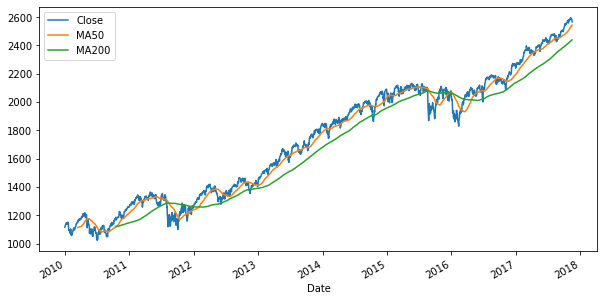

In [38]:
sp500.plot(y=['Close', 'MA50', 'MA200'], figsize=[10,5]) #Geen x='Date' want Date zit niet meer in sp500


- In August 2011, stock markets across the world [saw a sharp drop in stock prices](https://en.wikipedia.org/wiki/August_2011_stock_markets_fall), due to the [European sovereign debt crisis](https://en.wikipedia.org/wiki/European_debt_crisis). Look for that drop in the plot.
- After the 2011 stock markets fall, there are *two* occurrences of a golden cross.
- Both occurrences mark the beginning of long periods with a *bull market* (characterized by rising prices). If possible, identify how long each period lasted, i.e. when does the `MA50` drops below `MA200` again?
- Can you identify occurrences when the `MA200` effectively behaves like a support level?

1.
2. Wanneer shortterm average (geel) boven longterm (groen) komt
3. Eind 2015
4.

Using a span of 2, forecast the price of the index on the next trading day with the moving average method.
How well does the moving average method with span 2 forecast the known observations in this series for the years = 2010 .. 2016
Repeat part a with a span of 5; with a span of 15.
Which of these three spans appears to be most appropriate?

In [39]:
for j in (2, 5, 10):
    print(f"Span is {j}")
    sp500['MA'] =  sp500['Close'].rolling(j).mean()
    sp500['Shift'] =  sp500['MA'].shift(1)
    for i in range(2010, 2017):
        result = abs(sp500[sp500.index.year==i]['Shift'] - sp500[sp500.index.year==i]['Close']).sum()
        print(f'    {i} => {result}')

Span is 2
    2010 => 2566.8104264999993
    2011 => 3610.710272499999
    2012 => 2403.6461819999986
    2013 => 2454.519897
    2014 => 2863.5908809999987
    2015 => 4140.076781499998
    2016 => 3227.1790805
Span is 5
    2010 => 3570.3950171999986
    2011 => 4763.4626552
    2012 => 3286.765163599998
    2013 => 3416.0466567999983
    2014 => 4036.775367199997
    2015 => 5019.865577800006
    2016 => 4427.781545000001
Span is 10
    2010 => 4734.970718599999
    2011 => 5794.079925599997
    2012 => 4031.7922374999994
    2013 => 4552.500248800003
    2014 => 5345.134337499998
    2015 => 6056.251891600001
    2016 => 6033.123142300003



Use Holt's exponential smoothing to forecast the data. Use the default smoothing constants of 0.1

C:\Users\jonad\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Date'>

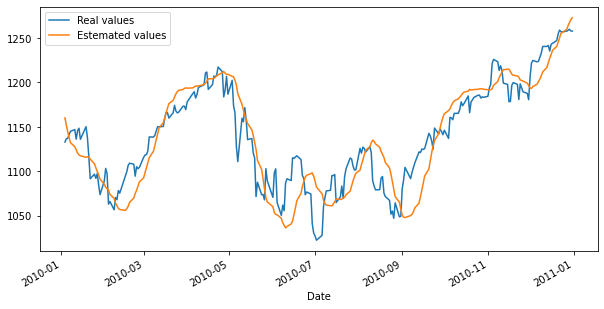

In [47]:
from statsmodels.tsa.api import Holt

sp500_des = Holt(sp500[sp500.index.year == 2010]['Close']).fit(smoothing_level=.1, smoothing_trend=.2)

sp500_fitted = sp500_des.fittedvalues
sp500[sp500.index.year == 2010]['Close'].plot(legend=True, label='Real values', figsize=[10,5])
sp500_fitted.plot(legend=True, label='Estemated values', figsize=[10,5])

## References

Hoseinzade, E., & Haratizadeh, S. (2019-09). *CNNpred: CNN-based stock market prediction using a diverse set of variables.* Expert Systems with Applications, **129,** pp. 273–285. https://doi.org/10.1016/j.eswa.2019.03.029